<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Drug_prediction_by_Radom_forest_algorithm(No_outlier_handling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case study we learn how practice **Random forest agorithm** (supervised model-clasifier) to predict the drug.  

**1. We import library and load dataset drug200.csv**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv('/content/drug200.csv')
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
199,40,F,LOW,NORMAL,11.349,drugX
92,29,F,HIGH,HIGH,29.450,drugY
61,24,M,HIGH,NORMAL,9.475,drugA
81,64,M,NORMAL,HIGH,7.761,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
179,67,F,NORMAL,HIGH,15.891,drugY
27,49,F,NORMAL,NORMAL,9.381,drugX
106,22,M,NORMAL,HIGH,11.953,drugX
72,24,F,NORMAL,HIGH,10.605,drugX
35,46,M,NORMAL,NORMAL,7.285,drugX


**2. Data preprocessing**

In [14]:
df.shape  # We find that thare are 200 rows dan 6 coulmns data

(200, 6)

In [15]:
df.info()    # There is no missing value. Dataset has 4 object type, 1 integer type data and 1 float type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We have to change the object type to category type, so we can do encoding and scaling data later

In [16]:
df[['Sex','BP','Cholesterol','Drug']]=df[['Sex','BP','Cholesterol','Drug']].astype('category')

We do ordinal encoding for column 'BP' and 'Cholesterol' because there are leveling value in there . We do enccoding by replace fuction. 

In [17]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [18]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

**Encoding**

In [19]:
dic={'BP':{'HIGH':3,'LOW':1,'NORMAL':2}, 'Cholesterol':{'HIGH':2,'NORMAL':1}}

In [20]:
df=df.replace(dic)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,3,2,25.355,drugY
1,47,M,1,2,13.093,drugC
2,47,M,1,2,10.114,drugC
3,28,F,2,2,7.798,drugX
4,61,F,1,2,18.043,drugY


We do label encoding for 'Sex' column because it has 2 value categories

In [21]:
df['Sex']=df['Sex'].cat.codes

In [25]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,2,25.355,drugY
1,47,1,1,2,13.093,drugC
2,47,1,1,2,10.114,drugC
3,28,0,2,2,7.798,drugX
4,61,0,1,2,18.043,drugY


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    int8    
 2   BP           200 non-null    int64   
 3   Cholesterol  200 non-null    int64   
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(3), int8(1)
memory usage: 7.0 KB


In [26]:
df_features=df.drop('Drug', axis=1)
df_target=df['Drug']
y=df_target

In [27]:
y.head(5)

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

In [28]:
df_features.shape

(200, 5)

In [29]:
df_features.sample(20)

,Age,Sex,BP,Cholesterol,Na_to_K
183,36,0,3,1,15.490
159,34,0,1,1,12.923
75,26,1,1,1,20.909
169,20,0,3,2,11.262
3,28,0,2,2,7.798
33,65,0,3,1,31.876
1,47,1,1,2,13.093
185,57,0,2,1,25.893
10,47,0,1,2,11.767
52,62,1,1,1,27.183


**Scaling**

We do scaling by Standard Scaler because the dataset already normal distribution 

In [30]:
from sklearn.preprocessing import StandardScaler  # The result is array data
X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:10]

array([[-1.29159102, -1.040833  ,  1.11692063,  0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892, -1.2722144 ,  0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892, -1.2722144 ,  0.97043679, -0.82855818],
       [-0.988614  , -1.040833  , -0.07764689,  0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  , -1.2722144 ,  0.97043679,  0.27179427],
       [-1.35218642, -1.040833  , -0.07764689,  0.97043679, -1.03769314],
       [ 0.28388946, -1.040833  , -0.07764689,  0.97043679,  0.02643885],
       [-0.20087376,  0.96076892, -1.2722144 ,  0.97043679, -0.70046821],
       [ 0.9504389 ,  0.96076892, -0.07764689,  0.97043679, -0.12676951],
       [-0.07968296,  0.96076892, -1.2722144 , -1.03046381,  0.45567206]])

In [32]:
nums=['Age','Sex','BP','Cholesterol','Na_to_K'] 
features=nums 

In [33]:
new_df_features = pd.DataFrame(data=X, columns=features) # Array data have to be transformed to dataframe
new_df_features.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,-1.040833,1.116921,0.970437,1.286522
1,0.162699,0.960769,-1.272214,0.970437,-0.415145
2,0.162699,0.960769,-1.272214,0.970437,-0.828558
3,-0.988614,-1.040833,-0.077647,0.970437,-1.149963
4,1.011034,-1.040833,-1.272214,0.970437,0.271794
5,-1.352186,-1.040833,-0.077647,0.970437,-1.037693
6,0.283889,-1.040833,-0.077647,0.970437,0.026439
7,-0.200874,0.960769,-1.272214,0.970437,-0.700468
8,0.950439,0.960769,-0.077647,0.970437,-0.126770
9,-0.079683,0.960769,-1.272214,-1.030464,0.455672


**We do train and split data**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [35]:
print('X_train')
print(X_train[0:10])
print('\n')
print('y_train')
print(y_train[0:10])


X_train
[[ 1.67758373  0.96076892  1.11692063 -1.03046381 -0.88920315]
 [-0.14027836  0.96076892 -1.2722144   0.97043679  0.54518238]
 [ 1.19282051  0.96076892  1.11692063 -1.03046381  0.67271724]
 [ 0.34448487 -1.040833   -0.07764689  0.97043679 -0.46926791]
 [ 1.25341591  0.96076892  1.11692063 -1.03046381 -0.65841918]
 [-0.74623239 -1.040833    1.11692063 -1.03046381  1.37242427]
 [-1.47337723 -1.040833   -0.07764689 -1.03046381 -0.94415833]
 [-1.77635424  0.96076892 -0.07764689  0.97043679 -0.97149714]
 [ 0.76865269 -1.040833   -0.07764689 -1.03046381  1.36118344]
 [ 0.52627108 -1.040833    1.11692063 -1.03046381 -0.49813326]]


y_train
108    drugB
107    drugY
189    drugY
14     drugX
56     drugB
19     drugY
114    drugX
39     drugX
185    drugY
124    drugB
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Testing data**

In [36]:
print('X_test')
print(X_test[0:10])
print('\n')
print('y_test')
print(y_test[0:10])

X_test
[[ 0.9504389   0.96076892 -0.07764689 -1.03046381 -0.83175002]
 [ 1.73817914 -1.040833   -0.07764689  0.97043679  0.43527203]
 [ 0.52627108  0.96076892 -0.07764689  0.97043679 -0.27081868]
 [-0.988614   -1.040833   -1.2722144   0.97043679 -0.41042702]
 [-1.59456803 -1.040833    1.11692063  0.97043679  2.92865486]
 [-1.29159102  0.96076892 -0.07764689 -1.03046381 -0.28650033]
 [-0.50385078  0.96076892 -1.2722144  -1.03046381 -0.64676202]
 [ 1.0110343  -1.040833   -1.2722144   0.97043679  0.27179427]
 [ 0.04150785  0.96076892 -1.2722144   0.97043679  0.25902691]
 [ 0.40508027 -1.040833   -1.2722144  -1.03046381  0.96012169]]


y_test
58     drugX
40     drugY
34     drugX
102    drugC
184    drugY
198    drugX
95     drugX
4      drugY
29     drugY
168    drugY
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Modeling Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
mod_rf = RandomForestClassifier(n_estimators=80, criterion='entropy')
mod_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

**Prediction data**

In [38]:
y_pred=mod_rf.predict(X_test)

In [ ]:
print('prediksi:')
print(y_pred[0:10])
print('\nsebenarnya:')
print(y_test[0:10])


prediksi:
['drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugX']

sebenarnya:
31     drugX
66     drugY
112    drugX
120    drugY
81     drugC
153    drugX
35     drugX
102    drugY
99     drugY
98     drugX
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Evaluation ML modeling**

In [39]:
from sklearn import metrics
# Menampilkan akurasi
print('Akurasi Random Forest :', metrics.accuracy_score(y_test, y_pred))

Akurasi Random Forest : 0.975


In [40]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      0.75      0.86         4
       drugX       0.93      1.00      0.96        13
       drugY       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40



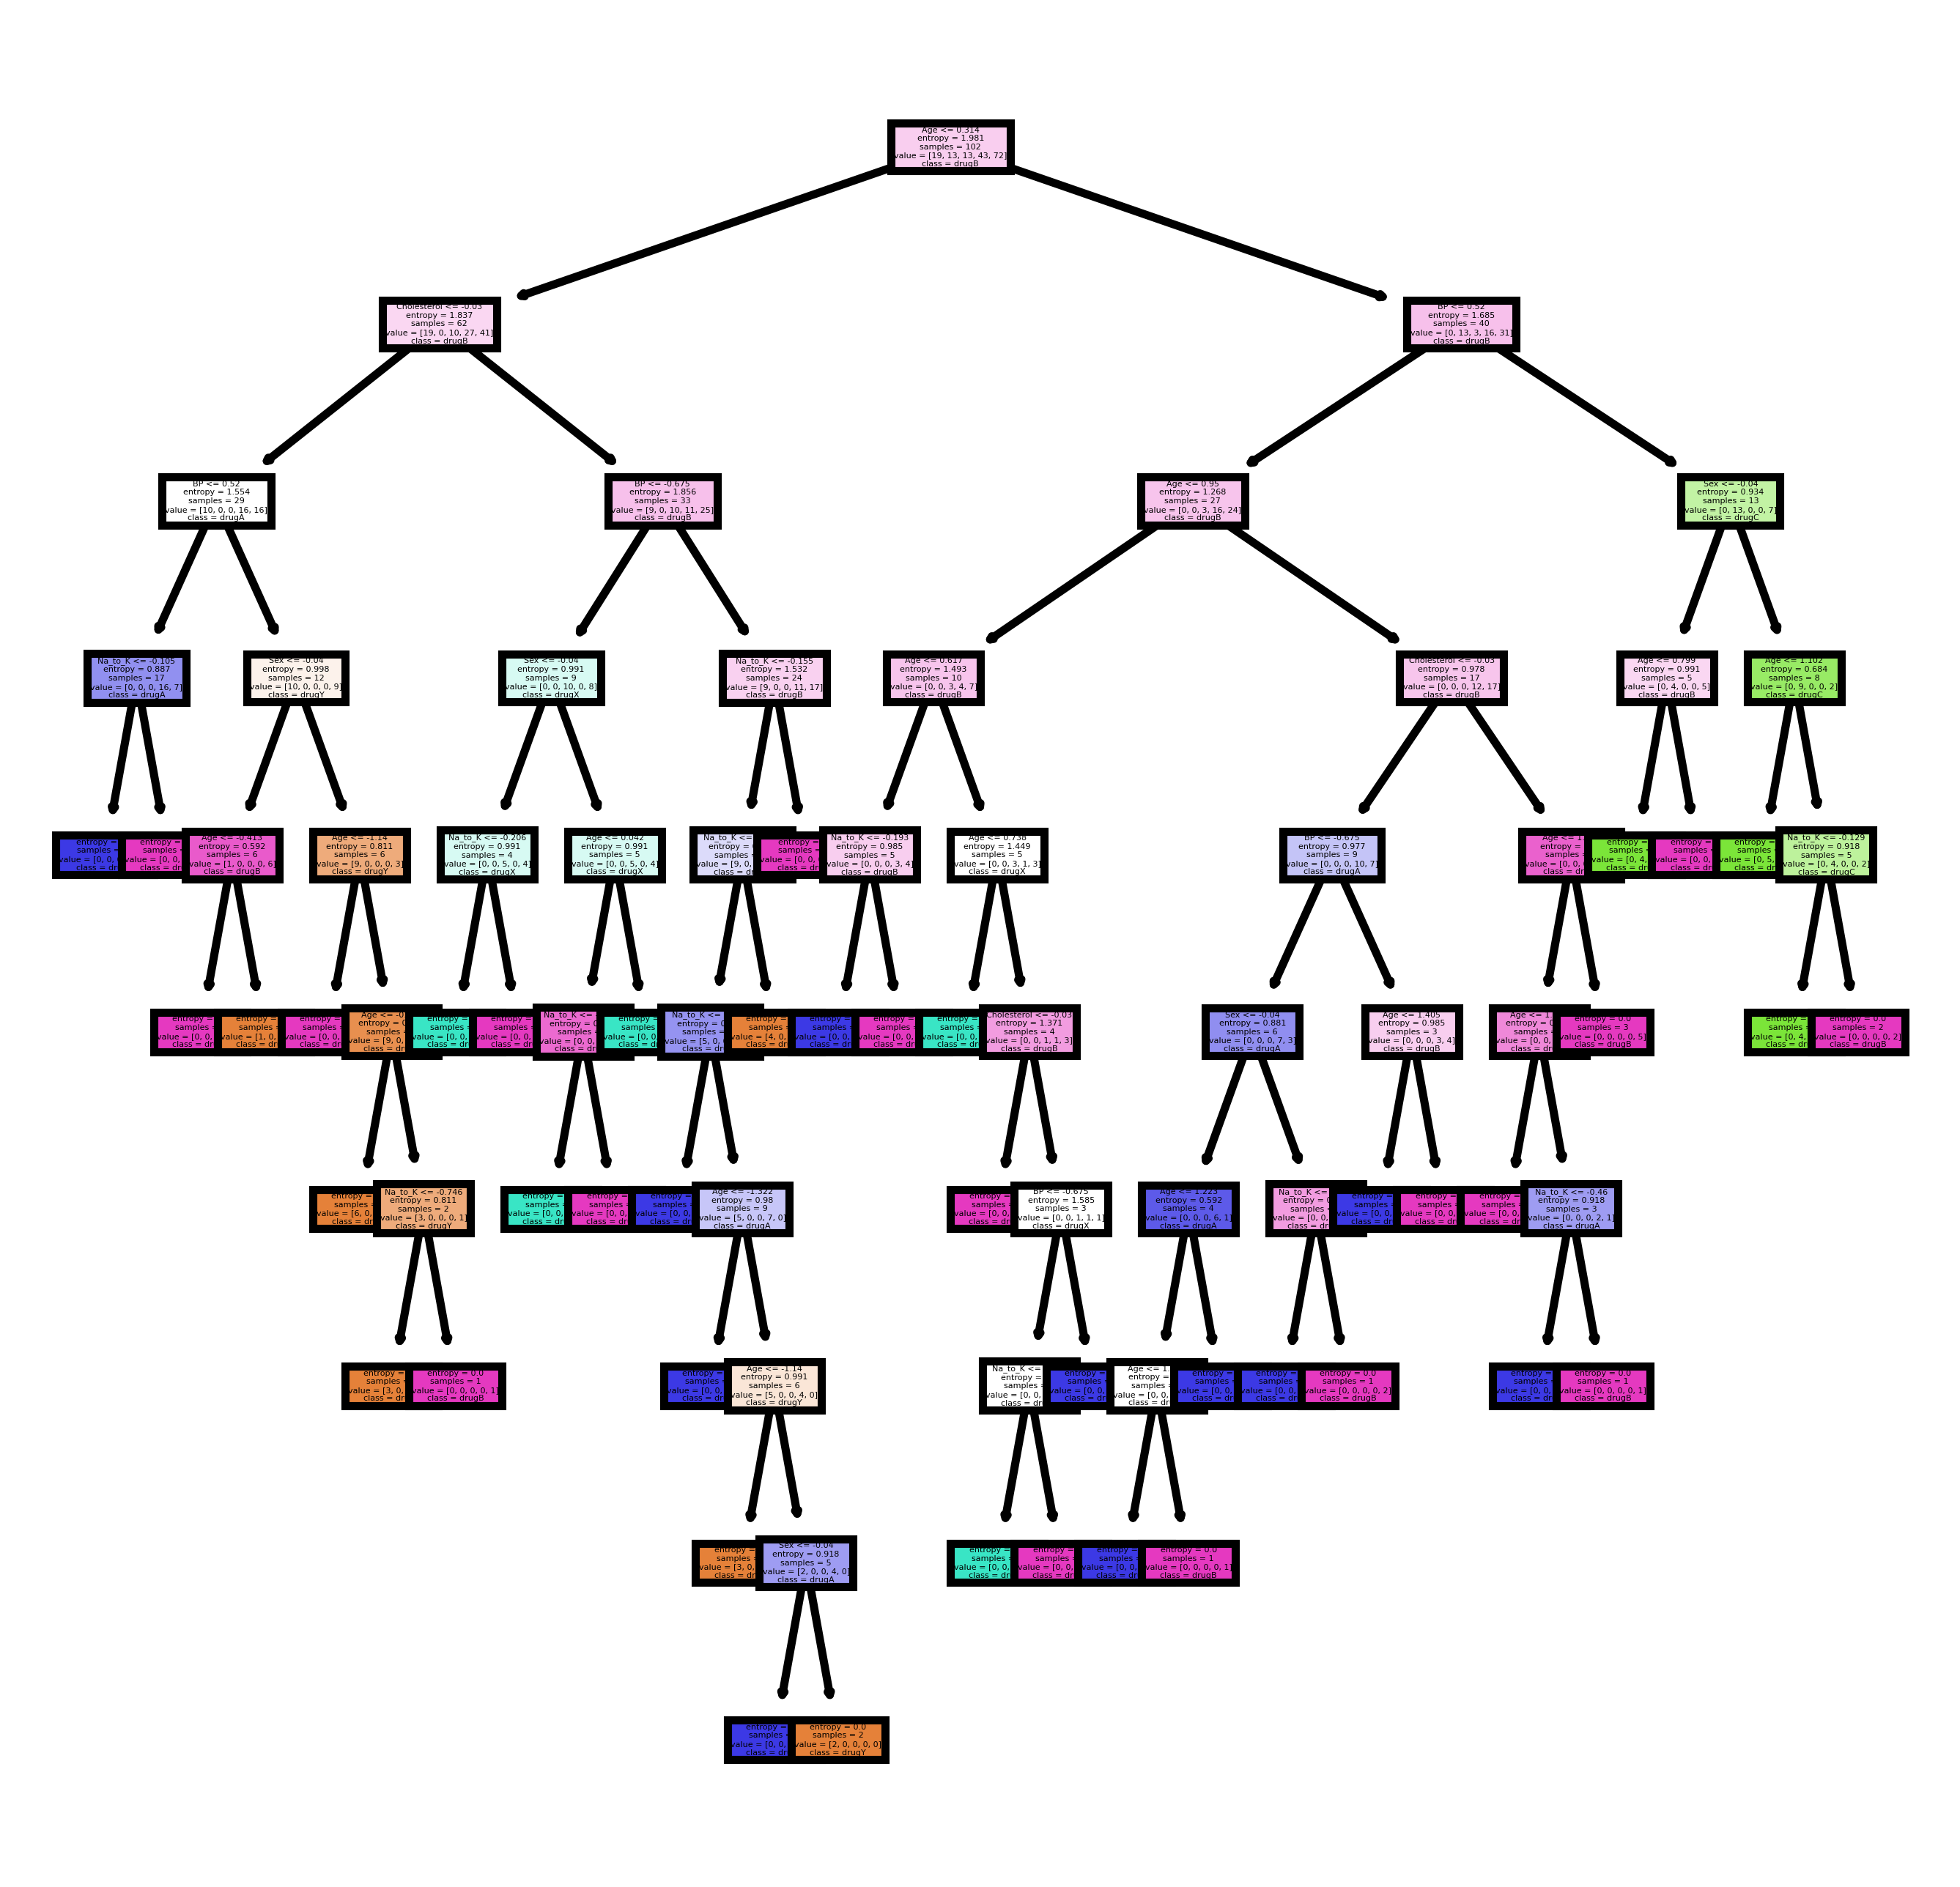

In [41]:
from six import StringIO
import pydotplus
from sklearn.tree import plot_tree
featureNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(mod_rf.estimators_[0],
 feature_names = featureNames, 
 class_names=targetNames,
 filled = True);
fig.savefig('rf_individualtree.png')
